## EDA Software Professionals Salaries 

The Information Technology and enabled services has been one of the key driving forces fuelling the world’s economic growth. The IT sector includes IT services, Business Process Management, Software products & engineering services and hardware. IT outsourcing is the strategic use of external service suppliers to efficiently provide IT-related business process, application service and infrastructure solutions for end-to-end business outcomes which were conventionally handled by internal resources. Companies opt for outsourcing primarily to scale back their business costs, accelerate time regarding completion of project, rely on external expertise to achieve tasks different from their core competencies and take advantage of intellectual property amongst others.

While Europe, the Middle East, and Africa (EMEA) are maintaining the largest share of IT outsourcing, India continues to be the most popular destination generating USD 137 billion of IT exports primarily through IT enabled services. Indian companies have established more than 1,000 global delivery centres in nearly 80 countries across the world. Software development outsourcing being one of the most mature industries of India, owns a large pool of IT specialists wherein the country benefits from being 5-6 times (or 80%) inexpensive than the U.S.

With the growth of IT industry in India the slaries for Skilled Tech Professionals has increased exponentially. Some Techonology sctors and Job Roles have shown extraordinary growth compared to others.

In this kernel we will dive deep into the survey data and analyze and gain critical insights about salary data of Tech Professionals.

**Content:-**

This Dataset contains information of 22700+ Software Professionals with different features like their Salaries (₹), Name of the Company, Company Rating, Number of times Salaries Reported, and Location of the Company.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("Salary_Dataset_with_Extra_Features.csv")
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [3]:
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


0

In [4]:
df.nunique()

Rating                  41
Company Name         11261
Job Title             1080
Salary                 316
Salaries Reported       82
Location                10
Employment Status        4
Job Roles               11
dtype: int64

In [5]:
df['Salaries Reported'].value_counts()

1      18206
2       2401
3        789
4        382
5        228
       ...  
39         1
162        1
361        1
135        1
100        1
Name: Salaries Reported, Length: 82, dtype: int64

In [6]:
print("Highest Salary:", round(df["Salary"].max()))
print("Lowest Salary:", round(df["Salary"].min()))

Highest Salary: 90000000
Lowest Salary: 2112


**LOCATION WISE AVERAGE SALARY**

**Making a column of Total Salary for particular Row by multiplying with Salaries Reported for getting Mean Salaries**

In [7]:
df['Total Salary']=df['Salary']*df['Salaries Reported']

In [8]:
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles,Total Salary
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android,1200000
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android,1200000
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android,3000000
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android,900000
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android,1800000


In [9]:
df1=df.groupby('Location').sum()
df1['Mean Salary']=df1['Total Salary']/df1['Salaries Reported']
df1.reset_index(inplace=True)
df1.sort_values(['Mean Salary'],ascending=False,inplace=True)
df1.head()

,Location,Rating,Salary,Salaries Reported,Total Salary,Mean Salary
7,Mumbai,2907.4,719924096,972,904820096,930884.872428
0,Bangalore,32396.8,6076888928,19124,15024764928,785649.703409
5,Kolkata,716.4,126544752,242,170124752,702994.842975
9,Pune,8292.9,1473476448,2733,1872547680,685161.975851
8,New Delhi,16467.7,2750968128,6252,4140793120,662314.958413


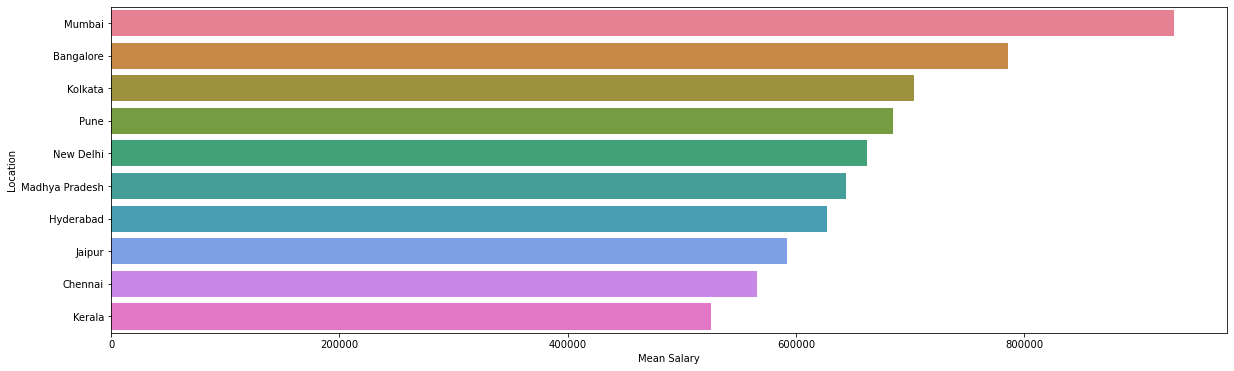

In [10]:
plt.figure(figsize = (20, 6))
sns.barplot(x = df1["Mean Salary"], y = df1["Location"], palette ='husl');

**LOCATION WISE JOBS COUNT**

In [11]:
df2=df1.sort_values(['Salaries Reported'],ascending=False)

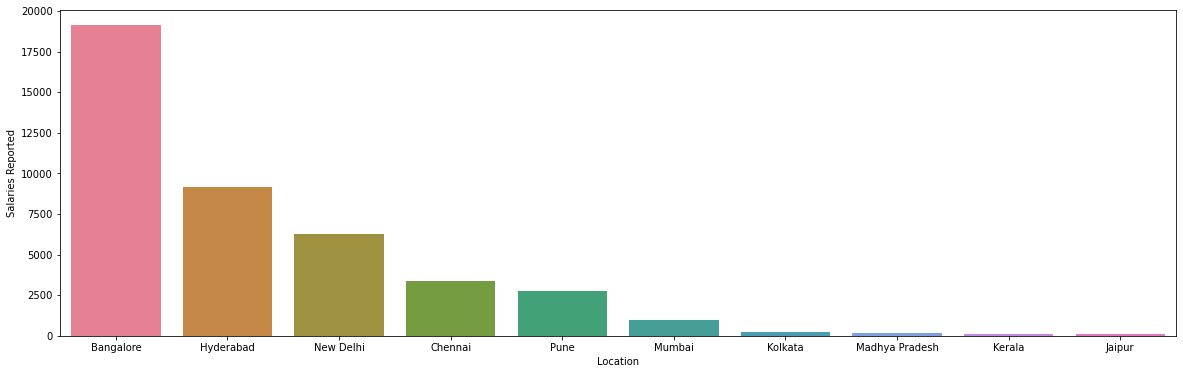

In [12]:
plt.figure(figsize = (20, 6))
sns.barplot(x = df2["Location"], y = df2["Salaries Reported"], palette ='husl');

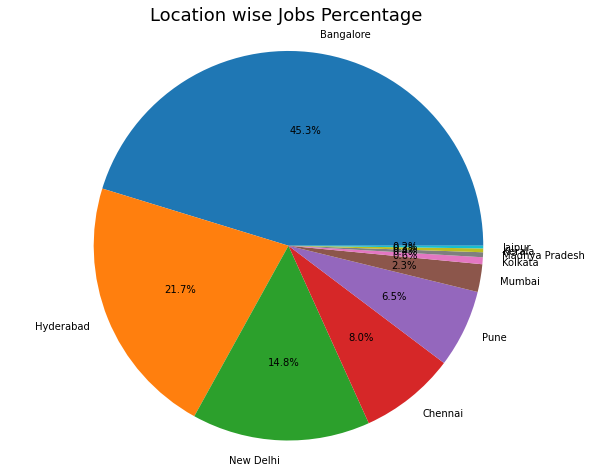

In [13]:
plt.figure(figsize=(10,8))
plt.pie(df2['Salaries Reported'],labels=df2['Location'],autopct='%1.1f%%')
plt.axis('equal')
plt.title('Location wise Jobs Percentage',fontsize=18)
plt.show()

**TOP SALARIES CHART WITH RESPECTIVE COMPANIES**

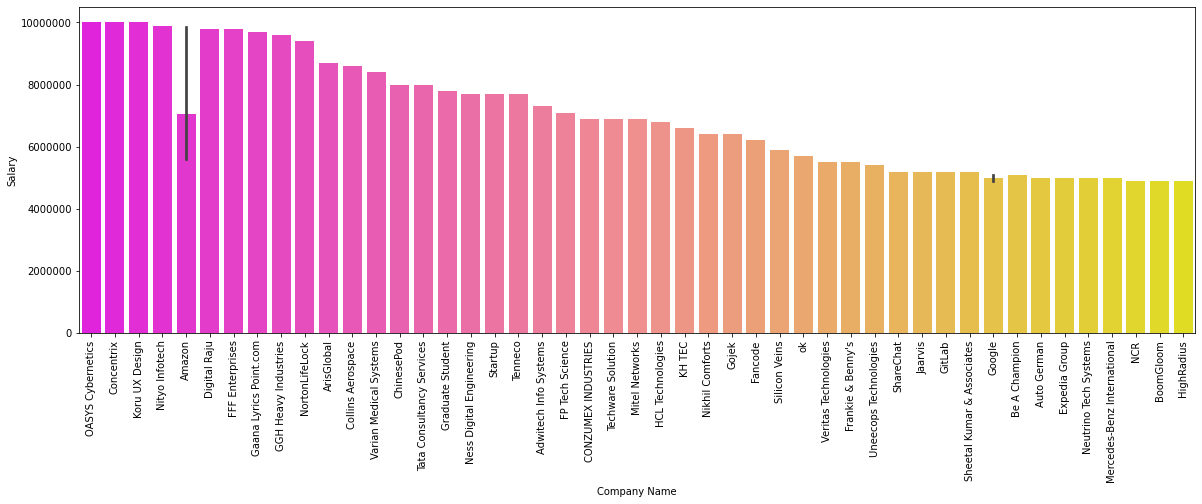

In [14]:
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["Company Name"][1:51],
            y = df["Salary"][1:51],
            palette = "spring");

### MEAN SALARIES OF TOP 20 HIGHEST PAYING COMPANIES

Considering companies having atleast 10 employees

In [15]:
df3=df.groupby('Company Name').sum()
df3=df3[df3['Salaries Reported']>10]
df3['Mean Salary']=df3['Total Salary']/df3['Salaries Reported']
df3.reset_index(inplace=True)
df3.sort_values(['Mean Salary'],ascending=False,inplace=True)
df3=df3.head(20)
df3.head()

,Company Name,Rating,Salary,Salaries Reported,Total Salary,Mean Salary
152,Gojek,52.4,32500000,17,43700000,2.570588e+06
180,Hotstar,52.8,38376000,31,70052000,2.259742e+06
240,McAfee,48.1,14180000,175,393180000,2.246743e+06
90,Cure.Fit,24.6,14100000,11,24200000,2.200000e+06
241,Media.net,37.8,19100000,21,43900000,2.090476e+06


### Plotting Bar Chart of Mean Salaries of Top 20 Companies

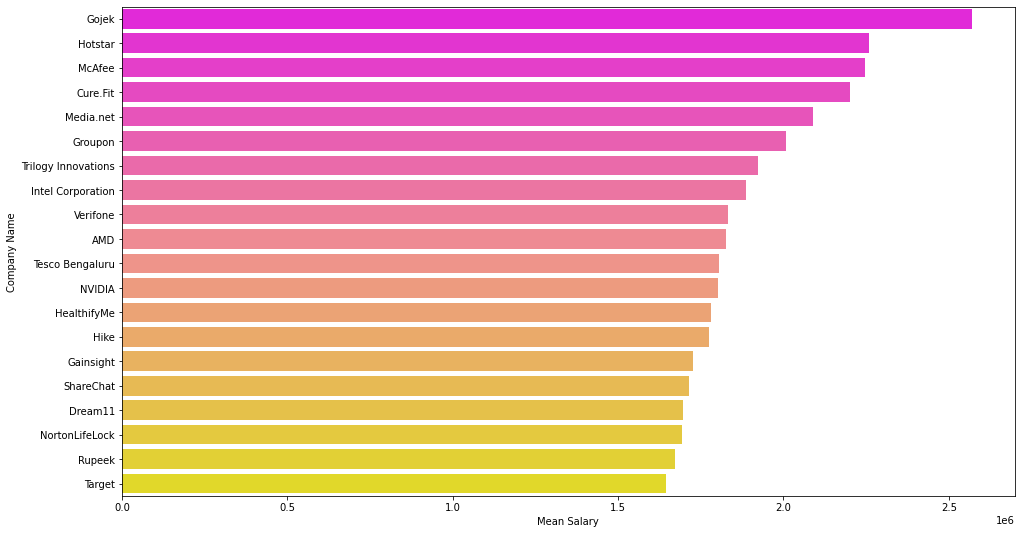

In [16]:
plt.figure(figsize = (16, 9))
sns.barplot(x = df3["Mean Salary"],
            y = df3["Company Name"],
            palette = "spring");

**DISTRIBUTION OF SALARIES**

Excluding Salaries beyond 99 percentile to get a better view of Salary distribution

(array([ 977., 2707., 3332., 2770., 2319., 1961., 1360., 1116.,  866.,
        1120.,  546.,  832.,  391.,  368.,  348.,  242.,  204.,  155.,
         174.,  140.,  110.,   84.,   68.,   82.,   63.,   53.,   36.,
          27.,   54.,   27.]),
 array([2.1120000e+03, 1.0204160e+05, 2.0197120e+05, 3.0190080e+05,
        4.0183040e+05, 5.0176000e+05, 6.0168960e+05, 7.0161920e+05,
        8.0154880e+05, 9.0147840e+05, 1.0014080e+06, 1.1013376e+06,
        1.2012672e+06, 1.3011968e+06, 1.4011264e+06, 1.5010560e+06,
        1.6009856e+06, 1.7009152e+06, 1.8008448e+06, 1.9007744e+06,
        2.0007040e+06, 2.1006336e+06, 2.2005632e+06, 2.3004928e+06,
        2.4004224e+06, 2.5003520e+06, 2.6002816e+06, 2.7002112e+06,
        2.8001408e+06, 2.9000704e+06, 3.0000000e+06]),
 <BarContainer object of 30 artists>)

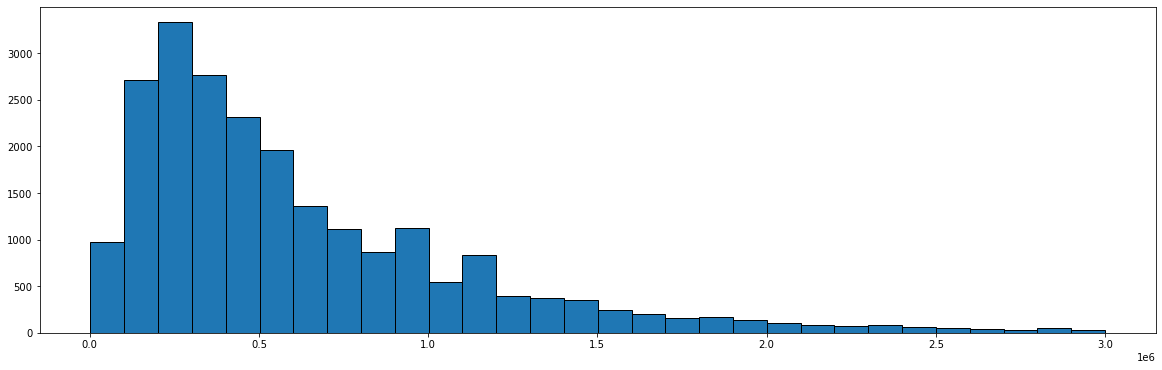

In [17]:
df4=df[df['Salary']<df['Salary'].quantile(0.99)]
plt.figure(figsize=(20,6))
plt.hist(df4['Salary'],bins=30,edgecolor='black')

**COMPANIES WITH MOST EMPLOYEES BY WORD CLOUD ON COMPANY NAMES** 

In [18]:
df5=df.groupby('Company Name').sum()
df5.reset_index(inplace=True)
df5.sort_values(['Salaries Reported'],ascending=False,inplace=True)
dF5=df5.head(50)
df5.head()

,Company Name,Rating,Salary,Salaries Reported,Total Salary
660,Amazon,699.2,217344992,2636,3707565744
4486,Infosys,557.7,82332000,2032,939372000
9161,Tata Consultancy Services,1056.8,138784640,1286,427492640
313,Accenture,615.0,92718000,894,470674000
10401,Wipro,463.6,59842000,651,203668000


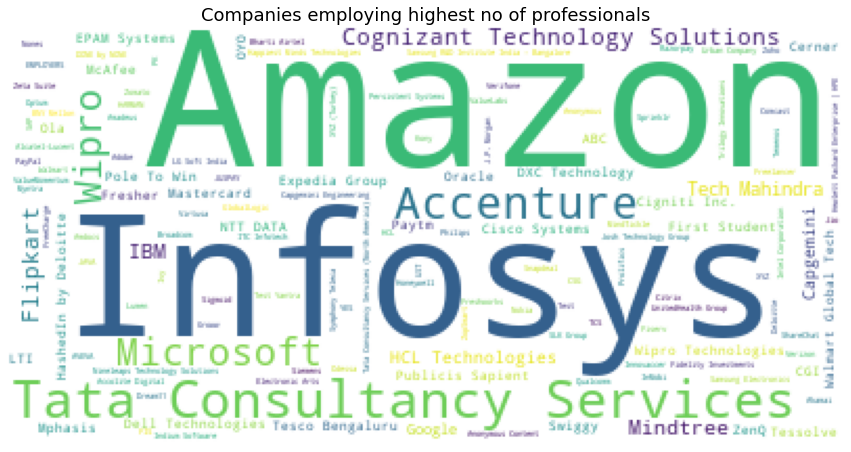

In [19]:
d = {w: f for w, f in
     zip(df5['Company Name'],df5['Salaries Reported'])}
wordcloud1 = WordCloud(background_color='white').generate_from_frequencies(frequencies=d)
# Generate plot
plt.figure(figsize=(15,15))
plt.imshow(wordcloud1)
plt.axis("off")
plt.title('Companies employing highest no of professionals', fontsize=18)
plt.show()

**TOP JOB TITLES**

In [20]:
df6=df.groupby('Job Title').sum()
df6.reset_index(inplace=True)
df6.sort_values(['Salaries Reported'],ascending=False,inplace=True)
df6=df6.head(25)
df6.head()

,Job Title,Rating,Salary,Salaries Reported,Total Salary
829,Software Development Engineer,9211.70,1837471760,4562,6149640992
831,Software Development Engineer (SDE),6370.70,1429870256,4059,2864746160
1040,Test Engineer,5034.30,659715296,3626,1535705984
28,Android Developer,7867.10,1030946784,2324,1145816160
205,Front End Developer,5575.55,818055456,1608,904475456


<AxesSubplot:xlabel='Job Title', ylabel='Salaries Reported'>

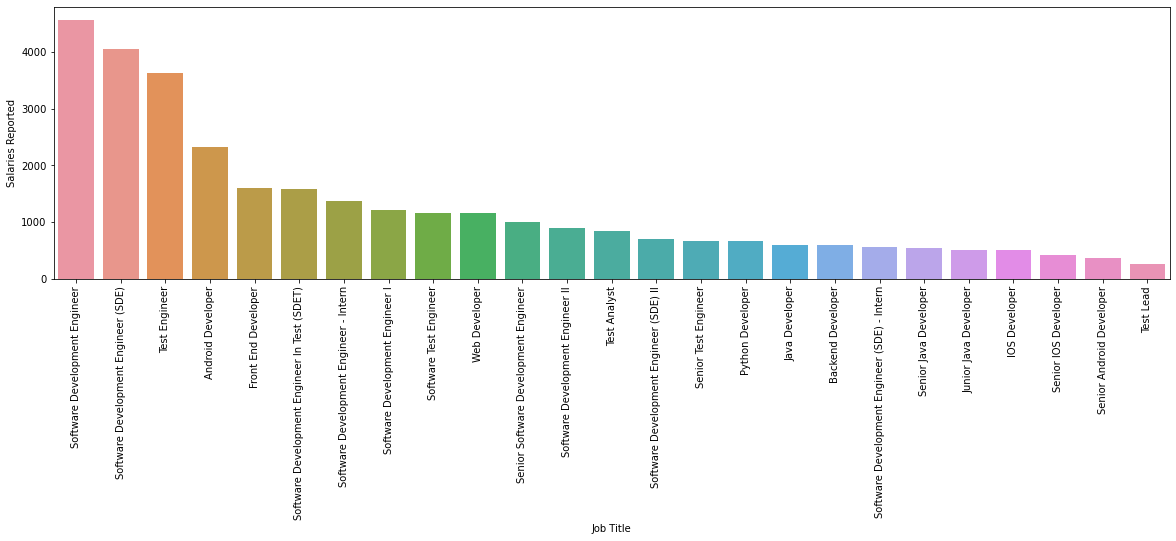

In [21]:
plt.figure(figsize = (20, 5))
plt.xticks(rotation=90)
sns.barplot(x=df6['Job Title'], y=df6['Salaries Reported'])

We observe some inconsostencies in Job Title Column- Same job titles have two unique spellings owing to suffix acronyms

**Handling Data Inconsistencies in Job Title Column**

In [22]:
df['Job Title'] = df['Job Title'].replace(['Software Development Engineer (SDE)'],'Software Development Engineer')
df['Job Title'] = df['Job Title'].replace(['Software Development Engineer (SDE) - Intern'],'Software Development Engineer - Intern')
df['Job Title'] = df['Job Title'].replace(['Software Development Engineer (SDE) II'],'Software Development Engineer II')
df['Job Title'] = df['Job Title'].replace(['Front End Web Developer'],'Front End Developer')
df['Job Title'] = df['Job Title'].replace(['Software Development Engineer III (SDEIII)'],'Software Development Engineer (SDE) III')
df['Job Title'] = df['Job Title'].replace(['Software Development Engineer -3'],'Software Development Engineer (SDE) III')

In [23]:
df6=df.groupby('Job Title').sum()
df6.reset_index(inplace=True)
df6.sort_values(['Salaries Reported'],ascending=False,inplace=True)
df6=df6.head(25)
df6.head()

,Job Title,Rating,Salary,Salaries Reported,Total Salary
828,Software Development Engineer,15582.40,3267342016,8621,9014387152
1034,Test Engineer,5034.30,659715296,3626,1535705984
28,Android Developer,7867.10,1030946784,2324,1145816160
846,Software Development Engineer - Intern,4242.20,440818576,1938,737576736
205,Front End Developer,6236.95,891419456,1798,988139456


<AxesSubplot:xlabel='Job Title', ylabel='Salaries Reported'>

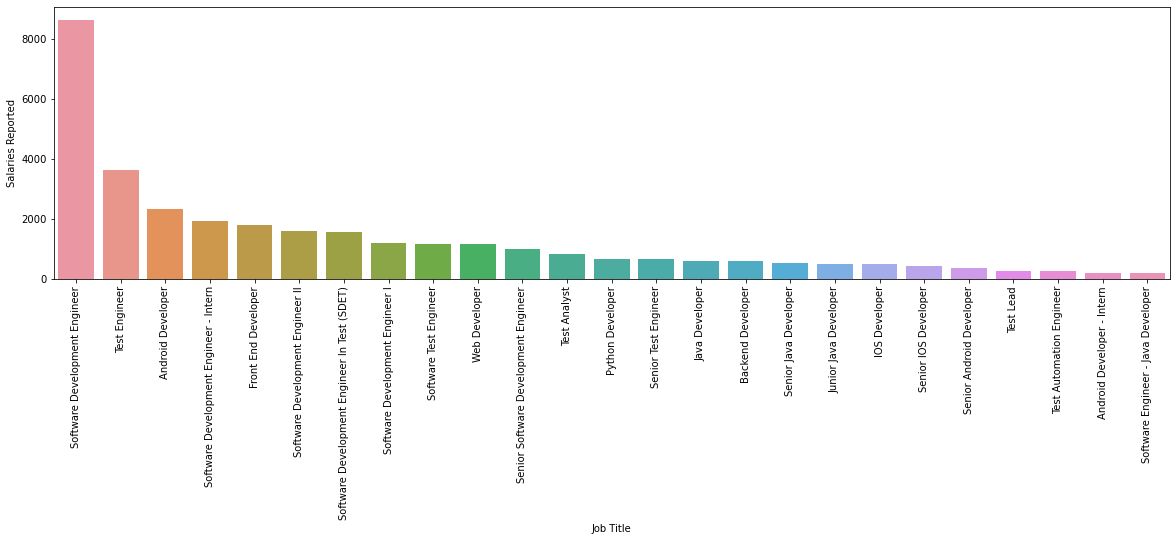

In [24]:
plt.figure(figsize = (20, 5))
plt.xticks(rotation=90)
sns.barplot(x=df6['Job Title'], y=df6['Salaries Reported'])

**TOP 10 JOB TITLES**

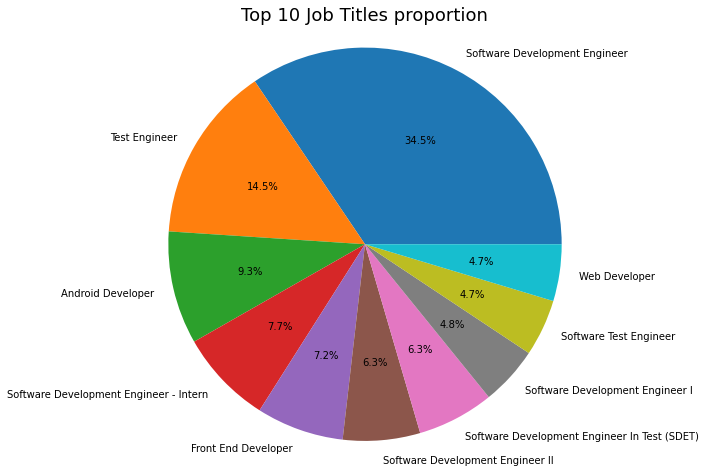

In [25]:
df7=df6[['Job Title','Salaries Reported']]
df7=df7.head(10)
plt.figure(figsize=(10,8))
plt.pie(df7['Salaries Reported'],labels=df7['Job Title'],autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 10 Job Titles proportion',fontsize=18)
plt.show()

**JOB ROLES COUNT**

In [26]:
df8=df.groupby('Job Roles').sum()
df8.reset_index(inplace=True)

In [27]:
df9=df8[['Job Roles','Salaries Reported']]
df9.sort_values(['Salaries Reported'],ascending=False,inplace=True)
df9

C:\Users\Acer\AppData\Local\Temp\ipykernel_9612\512571499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.sort_values(['Salaries Reported'],ascending=False,inplace=True)


,Job Roles,Salaries Reported
8,SDE,19787
9,Testing,7081
0,Android,3350
5,Java,2744
3,Frontend,2417
4,IOS,1772
1,Backend,1364
10,Web,1348
7,Python,1161
2,Database,962


**DIFFERENT JOB ROLES**

<AxesSubplot:xlabel='Job Roles'>

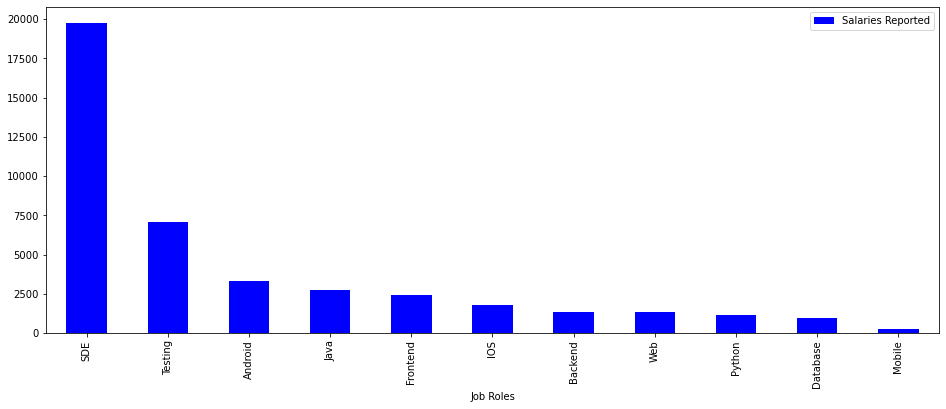

In [28]:
df9.plot(kind = 'bar',x='Job Roles',y='Salaries Reported',color='blue',figsize=(16,6))

**PROPORTION OF JOBS BY JOB ROLES**

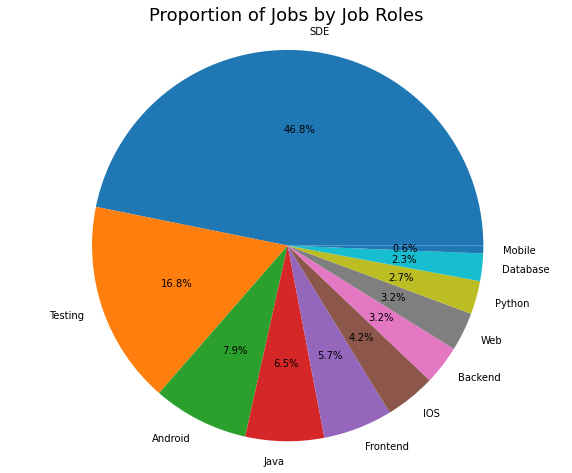

In [29]:
plt.figure(figsize=(10,8))
plt.pie(df9['Salaries Reported'],labels=df9['Job Roles'],autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of Jobs by Job Roles',fontsize=18)
plt.show()

**AVERAGE SALARY IN DIFFERENT JOB ROLES**

In [30]:
df8['Mean Salary']=df8['Total Salary']/df8['Salaries Reported']
df8.reset_index(inplace=True)
df8.sort_values(['Mean Salary'],ascending=False,inplace=True)
df8.head()

,index,Job Roles,Rating,Salary,Salaries Reported,Total Salary,Mean Salary
2,2,Database,3309.30,829175200,962,903427200,939113.513514
8,8,SDE,32239.10,6986600576,19787,18056774240,912557.448830
6,6,Mobile,974.20,216159328,270,235923328,873790.103704
1,1,Backend,4796.00,893730688,1364,1031238688,756040.093842
4,4,IOS,6369.55,1133959680,1772,1216454432,686486.699774


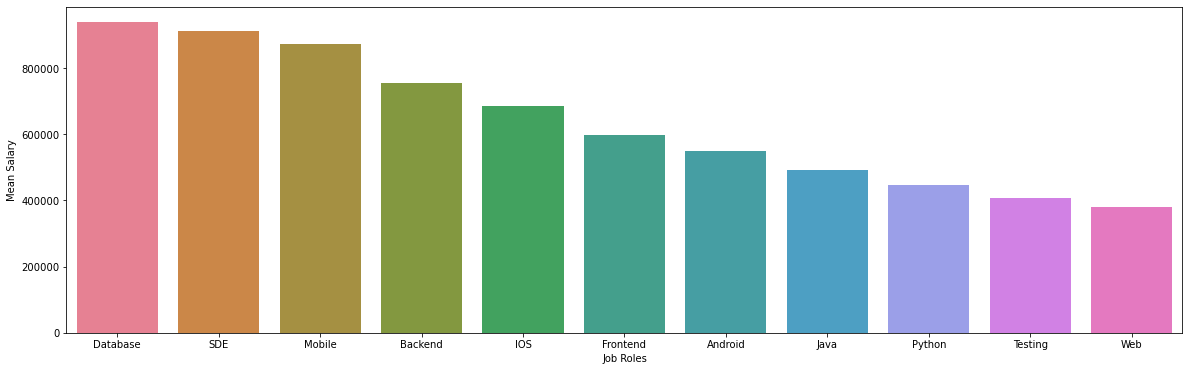

In [31]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = df8["Job Roles"], y = df8["Mean Salary"], palette = "husl");

**TOP COMPANIES BY RATINGS GIVEN BY EMPLOYEES**

Considering only companies with more than 20 employees

In [32]:
df10=df.groupby('Company Name').sum()
df10.reset_index(inplace=True)
df10=df10[df10['Salaries Reported']>20]
list=set(df10['Company Name'])

In [36]:
df11=df[df['Company Name'].isin(list)]
df12=pd.DataFrame(df11.groupby('Company Name')['Rating'].mean())
df12.reset_index(inplace=True)
df12.rename(columns={'index':'Company Name','Rating':'Average Rating'},inplace=True)
df12.sort_values(['Average Rating'],ascending=False,inplace=True)
df12=df12[:25]
df12.head()

,Company Name,Average Rating
121,MindTickle,4.7
184,TestVagrant,4.7
19,Atlassian,4.7
99,Intuit,4.6
113,LinkedIn,4.5


**WORDCLOUD OF TOP RATED COMPANIES**

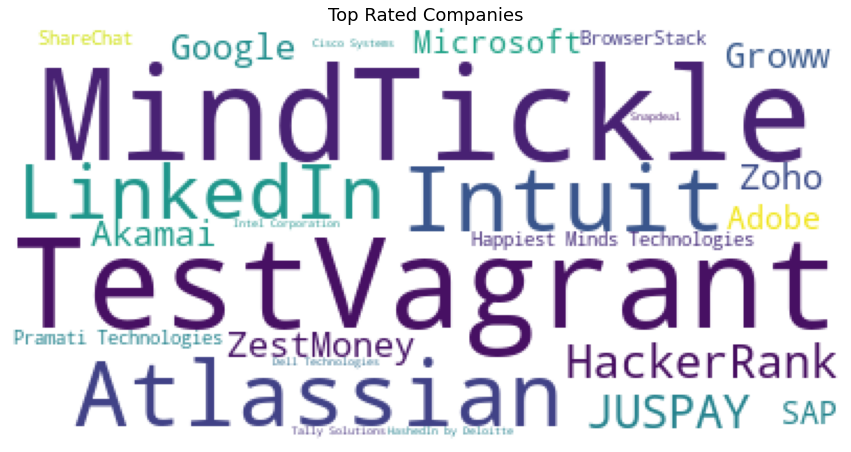

In [38]:
d = {w: f for w, f in
     zip(df12['Company Name'],df12['Average Rating'])}
wordcloud1 = WordCloud(background_color='white').generate_from_frequencies(frequencies=d)
# Generate plot
plt.figure(figsize=(15,15))
plt.imshow(wordcloud1)
plt.axis("off")
plt.title('Top Rated Companies', fontsize=18)
plt.show()

**DISTRIBUTION OF RATINGS GIVEN BY PROFESSIONALS TO ALL COMPANIES**

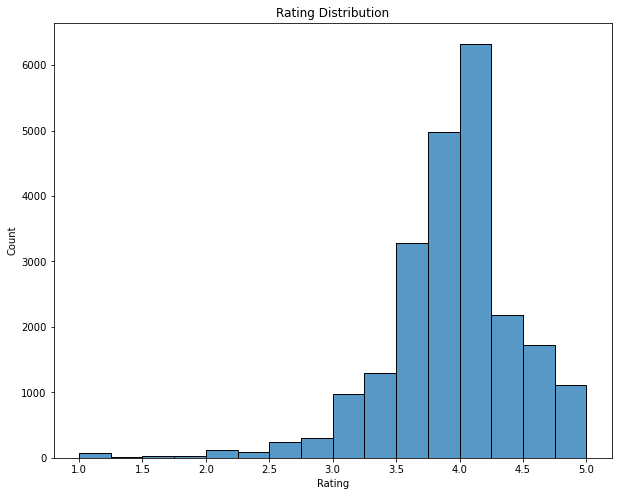

In [34]:
plt.figure(figsize=(10,8))
plt.title('Rating Distribution')
sns.histplot(df.Rating, palette="colors", bins=16)
plt.show()